In [1]:
#import packages 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import re
from pandas.plotting  import table

In [2]:
plt.rcParams.update({
    #"font.family": "serif",
    #"font.serif": [],                    # use latex default serif font
    #"font.sans-serif": ["DejaVu Sans"],  # use a specific sans-serif font
    "font.size": 14
})

#plt.rcParams.update({'font.size': 22})

In [3]:
#set the files variables 
input_file ="Energy_2020_03_13_03_55_PM.csv"
out_filename = "energy_preprocess.csv"

In [4]:
# Convert all white spaces into comma becuase the ActiveFeatures attribute uses 
# comma to seperate features 
f_out = open(out_filename,'w+')
with open(input_file, 'r') as f:
    for line in f:
        striped_line = re.sub("\s+", "|", line.strip())
        f_out.write(striped_line + '\n')
        #print ( striped_line )

f_out.close()


In [5]:
#read data from the csv
data = pd.read_csv(out_filename, sep="|", header=None, error_bad_lines=False, comment='#')

In [6]:
#Force that pandas dataframe  to show all the columns 
#from IPython.display import display
#pd.options.display.max_columns = None
#display(data)

In [7]:
# Add columns to the data frame 
data.columns = ['NodeName','Arch','CoresPerSocket','CPUAlloc','CPUErr','CPUTot','CPULoad',\
              'AvailableFeatures','ActiveFeatures','Gres','NodeAddr','NodeHostName','Version',\
              'OS','RealMemory','AllocMem','FreeMem','Sockets','Boards','State','ThreadsPerCore','TmpDisk','Weight',\
              'Owner','MCS_label','Partitions','BootTime','SlurmdStartTime','CfgTRES','AllocTRES','CapWatts','CurrentWatts',\
              'LowestJoules','ConsumedJoules','ExtSensorsJoules','ExtSensorsWatts','ExtSensorsTemp']

In [8]:
data

,NodeName,Arch,CoresPerSocket,CPUAlloc,CPUErr,CPUTot,CPULoad,AvailableFeatures,ActiveFeatures,Gres,...,SlurmdStartTime,CfgTRES,AllocTRES,CapWatts,CurrentWatts,LowestJoules,ConsumedJoules,ExtSensorsJoules,ExtSensorsWatts,ExtSensorsTemp
0,NodeName=gpu01,Arch=x86_64,CoresPerSocket=10,CPUAlloc=0,CPUErr=0,CPUTot=20,CPULoad=0.01,"AvailableFeatures=128gb,broadwell-ep,e5-2640v4","ActiveFeatures=128gb,broadwell-ep,e5-2640v4",Gres=gpu:gp100:2,...,SlurmdStartTime=2020-03-06T14:56:42,"CfgTRES=cpu=20,mem=128647M,gres/gpu=2",AllocTRES=,CapWatts=n/a,CurrentWatts=26,LowestJoules=327905,ConsumedJoules=14455238,ExtSensorsJoules=n/s,ExtSensorsWatts=0,ExtSensorsTemp=n/s
1,NodeName=gpu02,Arch=x86_64,CoresPerSocket=8,CPUAlloc=0,CPUErr=0,CPUTot=16,CPULoad=0.01,"AvailableFeatures=32gb,sandybridge-ep,e5-2665","ActiveFeatures=32gb,sandybridge-ep,e5-2665",Gres=gpu:k40c:2,...,SlurmdStartTime=2020-03-06T14:56:44,"CfgTRES=cpu=16,mem=31978M,gres/gpu=2",AllocTRES=,CapWatts=n/a,CurrentWatts=36,LowestJoules=89486,ConsumedJoules=22178750,ExtSensorsJoules=n/s,ExtSensorsWatts=0,ExtSensorsTemp=n/s
2,NodeName=nehalem01,Arch=x86_64,CoresPerSocket=4,CPUAlloc=0,CPUErr=0,CPUTot=8,CPULoad=0.01,"AvailableFeatures=24gb,nehalem-ep,e5620","ActiveFeatures=24gb,nehalem-ep,e5620",Gres=(null),...,SlurmdStartTime=2020-03-06T14:56:40,"CfgTRES=cpu=8,mem=23938M",AllocTRES=,CapWatts=n/a,CurrentWatts=n/s,LowestJoules=n/s,ConsumedJoules=n/s,ExtSensorsJoules=n/s,ExtSensorsWatts=0,ExtSensorsTemp=n/s
3,NodeName=nehalem02,Arch=x86_64,CoresPerSocket=4,CPUAlloc=0,CPUErr=0,CPUTot=8,CPULoad=0.01,"AvailableFeatures=24gb,nehalem-ep,e5620","ActiveFeatures=24gb,nehalem-ep,e5620",Gres=(null),...,SlurmdStartTime=2020-03-06T14:56:40,"CfgTRES=cpu=8,mem=23938M",AllocTRES=,CapWatts=n/a,CurrentWatts=n/s,LowestJoules=n/s,ConsumedJoules=n/s,ExtSensorsJoules=n/s,ExtSensorsWatts=0,ExtSensorsTemp=n/s
4,NodeName=node01,Arch=x86_64,CoresPerSocket=1,CPUAlloc=40,CPUErr=0,CPUTot=40,CPULoad=18.01,"AvailableFeatures=omnipart,128gb,broadwell-ep,...","ActiveFeatures=omnipart,128gb,broadwell-ep,e5-...",Gres=(null),...,SlurmdStartTime=2020-03-06T14:56:35,"CfgTRES=cpu=40,mem=128655M",AllocTRES=cpu=40,CapWatts=n/a,CurrentWatts=140,LowestJoules=508775,ConsumedJoules=97320117,ExtSensorsJoules=n/s,ExtSensorsWatts=0,ExtSensorsTemp=n/s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,NodeName=serial01,Arch=x86_64,CoresPerSocket=8,CPUAlloc=14,CPUErr=0,CPUTot=16,CPULoad=14.01,"AvailableFeatures=32gb,sandybridge-ep,e5-2650","ActiveFeatures=32gb,sandybridge-ep,e5-2650",Gres=(null),...,SlurmdStartTime=2020-03-06T14:56:41,"CfgTRES=cpu=16,mem=31955M",AllocTRES=cpu=14,CapWatts=n/a,CurrentWatts=90,LowestJoules=99783,ConsumedJoules=42151075,ExtSensorsJoules=n/s,ExtSensorsWatts=0,ExtSensorsTemp=n/s
147,NodeName=serial02,CoresPerSocket=8,CPUAlloc=0,CPUErr=0,CPUTot=16,CPULoad=N/A,"AvailableFeatures=32gb,sandybridge-ep,e5-2650","ActiveFeatures=32gb,sandybridge-ep,e5-2650",Gres=(null),NodeAddr=serial02,...,CapWatts=n/a,CurrentWatts=0,LowestJoules=0,ConsumedJoules=0,ExtSensorsJoules=n/s,ExtSensorsWatts=0,ExtSensorsTemp=n/s,NaN,NaN,NaN
148,NodeName=testing01,Arch=x86_64,CoresPerSocket=8,CPUAlloc=16,CPUErr=0,CPUTot=16,CPULoad=8.00,"AvailableFeatures=32gb,sandybridge-ep,e5-2650","ActiveFeatures=32gb,sandybridge-ep,e5-2650",Gres=(null),...,SlurmdStartTime=2020-03-06T14:56:40,"CfgTRES=cpu=16,mem=31955M",AllocTRES=cpu=16,CapWatts=n/a,CurrentWatts=105,LowestJoules=113153,ConsumedJoules=39330559,ExtSensorsJoules=n/s,ExtSensorsWatts=0,ExtSensorsTemp=n/s
149,NodeName=testing02,Arch=x86_64,CoresPerSocket=8,CPUAlloc=16,CPUErr=0,CPUTot=16,CPULoad=8.04,"AvailableFeatures=32gb,sandybridge-ep,e5-2650","ActiveFeatures=32gb,sandybridge-ep,e5-2650",Gres=(null),...,SlurmdStartTime=2020-03-06T14:56:40,"CfgTRES=cpu=16,mem=31955M",AllocTRES=cpu=16,CapWatts=n/a,CurrentWatts=101,LowestJoules=106178,ConsumedJoules=37007307,ExtSensorsJoules=n/s,ExtSensorsWatts=0,ExtSensorsTemp=n/s


In [9]:
# Remove preceeding values 
data = data.replace(to_replace ="NodeName=", value ="", regex=True) 
data = data.replace(to_replace ="Arch=", value ="", regex=True) 
data = data.replace(to_replace ="CoresPerSocket=", value ="", regex=True) 
data = data.replace(to_replace ="CPUAlloc=", value ="", regex=True) 
data = data.replace(to_replace ="CPUErr=", value ="", regex=True) 
data = data.replace(to_replace ="CPUTot=", value ="", regex=True)
data = data.replace(to_replace ="CPULoad=", value ="", regex=True)
data = data.replace(to_replace ="AvailableFeatures=", value ="", regex=True)
data = data.replace(to_replace ="ActiveFeatures=", value ="", regex=True)
data = data.replace(to_replace ="Gres=", value ="", regex=True)
data = data.replace(to_replace ="NodeAddr=", value ="", regex=True)
data = data.replace(to_replace ="Version=", value ="", regex=True)
data = data.replace(to_replace ="NodeHostName=", value ="", regex=True)
data = data.replace(to_replace ="OS=", value ="", regex=True)
data = data.replace(to_replace ="RealMemory=", value ="", regex=True)
data = data.replace(to_replace ="AllocMem=", value ="", regex=True)
data = data.replace(to_replace ="FreeMem=", value ="", regex=True)
data = data.replace(to_replace ="Sockets=", value ="", regex=True)
data = data.replace(to_replace ="Boards=", value ="", regex=True)
data = data.replace(to_replace ="State=", value ="", regex=True)
data = data.replace(to_replace ="ThreadsPerCore=", value ="", regex=True)
data = data.replace(to_replace ="TmpDisk=", value ="", regex=True)
data = data.replace(to_replace ="Weight=", value ="", regex=True)
data = data.replace(to_replace ="Owner=", value ="", regex=True)
data = data.replace(to_replace ="MCS_label=", value ="", regex=True)
data = data.replace(to_replace ="ThreadsPerCore=", value ="", regex=True)
data = data.replace(to_replace ="Partitions=", value ="", regex=True)
data = data.replace(to_replace ="BootTime=", value ="", regex=True)
data = data.replace(to_replace ="SlurmdStartTime=", value ="", regex=True)
data = data.replace(to_replace ="CfgTRES=", value ="", regex=True)
data = data.replace(to_replace ="AllocTRES=", value ="", regex=True)
data = data.replace(to_replace ="CapWatts=", value ="", regex=True)
data = data.replace(to_replace ="CurrentWatts=", value ="", regex=True)
data = data.replace(to_replace ="LowestJoules=", value ="", regex=True)
data = data.replace(to_replace ="ConsumedJoules=", value ="", regex=True)
data = data.replace(to_replace ="ExtSensorsJoules=", value ="", regex=True)
data = data.replace(to_replace ="ExtSensorsWatts=", value ="", regex=True)
data = data.replace(to_replace ="ExtSensorsTemp=", value ="", regex=True)

In [10]:
#Collect data from nodes that have an arbnomal reading 

# sub_data = data.loc[:, ['ConsumedMegajoules','NodeName','Lowestkilojoules', 'Partitions', 'AvailableFeatures']]
# node103 -> ({LowestJoules,5200},{ConsumedJoules,12370469}, {SlurmdStartTime,2020-03-09T01:01:34}, {'AvailableFeatures', 'infiniband,64gb,ivybridge-ep,e5-2680v2'})
# node93 -> ({LowestJoules,48458},{ConsumedJoules,12357244}, {SlurmdStartTime,2020-03-06T14:56:35}, {'AvailableFeatures', 'infiniband,64gb,ivybridge-ep,e5-2680v2'})
# node109 -> ({LowestJoules,75484},{ConsumedJoules,48095516}, {SlurmdStartTime,2020-03-06T14:56:35}, {'AvailableFeatures', 'infiniband,64gb,ivybridge-ep,e5-2680v2'})
# node132 -> ({LowestJoules,149126},{ConsumedJoules,19448683}, {SlurmdStartTime,2020-03-06T14:56:36}, {'AvailableFeatures', 'infiniband,64gb,ivybridge-ep,e5-2680v2'})
# node133 -> ({LowestJoules,134122},{ConsumedJoules,16314281}, {SlurmdStartTime,2020-03-06T14:56:37}, {'AvailableFeatures', 'infiniband,64gb,ivybridge-ep,e5-2680v2'})
# node134 -> ({LowestJoules,78100},{ConsumedJoules,19010896}, {SlurmdStartTime,2020-03-06T14:56:37}, {'AvailableFeatures', 'infiniband,64gb,ivybridge-ep,e5-2680v2'})

#Add nodes that have an abnormal nodes to the data frame.
df = pd.DataFrame([[12.37, 'node103', 52.00,'esp1','infiniband,64gb,ivybridge-ep,e5-2680v2','2020-03-09T01:01:34'], 
                   [12.35, 'node93', 48.46,'esp','infiniband,64gb,ivybridge-ep,e5-2680v2', '2020-03-06T14:56:35'],
                   [48.09, 'node109', 75.48,'esp1','infiniband,64gb,ivybridge-ep,e5-2680v2','2020-03-06T14:56:35'],
                   [19.45, 'node132', 149.12,'long','infiniband,64gb,ivybridge-ep,e5-2680v2','2020-03-06T14:56:36'],
                   [16.31, 'node133', 134.12,'long','infiniband,64gb,ivybridge-ep,e5-2680v2','2020-03-06T14:56:37'],
                   [19.01, 'node134', 78.10,'long','infiniband,64gb,ivybridge-ep,e5-2680v2','2020-03-06T14:56:37']
                  ],
                  columns= ['ConsumedMegajoules','NodeName','Lowestkilojoules', 'Partitions', 'AvailableFeatures', 'SlurmdStartTime'])

#"""
#row = data.loc[data['NodeName'] == "node134"]
#from IPython.display import display
#pd.options.display.max_columns = None
#display(row)
#""" 

In [11]:
# remove some wierd nodes for now 
data = data[data.NodeName != "node103"]
data = data[data.NodeName != "node93"]
data = data[data.NodeName != "node109"]
data = data[data.NodeName != "node132"]
data = data[data.NodeName != "node133"]
data = data[data.NodeName != "node134"]
#data

In [12]:
# Remove nodes that were not recording any data 
data = data[data.NodeName != "nehalem01"]
data = data[data.NodeName != "nehalem02"]

#These nodes where not making any recordings but I noticed that they had wierd NodeHostname I am not sure if this is the reason 
data = data[data.NodeName != "westmere01"] #NodeHostName = 23938
data = data[data.NodeName != "serial02"] #nodehostname = 31955

# convert String variables to int double precision
cols = ['ConsumedJoules', 'LowestJoules']
data[cols] = data[cols].applymap(np.int64)
#data

In [13]:
# sava data to csv 
data.to_csv("processed_energy.csv", index=False)

In [14]:
# Convert  ConsumedJoules  to ConsumedMegajoules
data['ConsumedMegajoules'] = data['ConsumedJoules']/1000000

# Convert  LowestJoules  to Lowestkilojoules
data['Lowestkilojoules'] = data['LowestJoules']/1000

#check the result to see if that is teh expected
data.head()

,NodeName,Arch,CoresPerSocket,CPUAlloc,CPUErr,CPUTot,CPULoad,AvailableFeatures,ActiveFeatures,Gres,...,AllocTRES,CapWatts,CurrentWatts,LowestJoules,ConsumedJoules,ExtSensorsJoules,ExtSensorsWatts,ExtSensorsTemp,ConsumedMegajoules,Lowestkilojoules
0,gpu01,x86_64,10,0,0,20,0.01,"128gb,broadwell-ep,e5-2640v4","128gb,broadwell-ep,e5-2640v4",gpu:gp100:2,...,,n/a,26,327905,14455238,n/s,0,n/s,14.455238,327.905
1,gpu02,x86_64,8,0,0,16,0.01,"32gb,sandybridge-ep,e5-2665","32gb,sandybridge-ep,e5-2665",gpu:k40c:2,...,,n/a,36,89486,22178750,n/s,0,n/s,22.178750,89.486
4,node01,x86_64,1,40,0,40,18.01,"omnipart,128gb,broadwell-ep,e5-2640v4","omnipart,128gb,broadwell-ep,e5-2640v4",(null),...,cpu=40,n/a,140,508775,97320117,n/s,0,n/s,97.320117,508.775
5,node02,x86_64,1,40,0,40,18.06,"omnipart,128gb,broadwell-ep,e5-2640v4","omnipart,128gb,broadwell-ep,e5-2640v4",(null),...,cpu=40,n/a,133,348011,92215966,n/s,0,n/s,92.215966,348.011
6,node03,x86_64,1,40,0,40,18.01,"omnipart,128gb,broadwell-ep,e5-2640v4","omnipart,128gb,broadwell-ep,e5-2640v4",(null),...,cpu=40,n/a,141,502728,96752409,n/s,0,n/s,96.752409,502.728


In [15]:
# Create a sub dataframe with data with columns that we only need. 
sub_data = data.loc[:, ['ConsumedMegajoules','NodeName','Lowestkilojoules', 'Partitions', 'AvailableFeatures', 'SlurmdStartTime']]
sub_data

,ConsumedMegajoules,NodeName,Lowestkilojoules,Partitions,AvailableFeatures,SlurmdStartTime
0,14.455238,gpu01,327.905,gpu,"128gb,broadwell-ep,e5-2640v4",2020-03-06T14:56:42
1,22.178750,gpu02,89.486,gpu,"32gb,sandybridge-ep,e5-2665",2020-03-06T14:56:44
4,97.320117,node01,508.775,cmsp,"omnipart,128gb,broadwell-ep,e5-2640v4",2020-03-06T14:56:35
5,92.215966,node02,348.011,cmsp,"omnipart,128gb,broadwell-ep,e5-2640v4",2020-03-06T14:56:35
6,96.752409,node03,502.728,cmsp,"omnipart,128gb,broadwell-ep,e5-2640v4",2020-03-06T14:56:35
...,...,...,...,...,...,...
144,91.436006,node183,599.478,cmsp,"omnipart,192,broadwell-ep,e5-2640v4",2020-03-06T14:56:35
145,86.243392,node184,415.349,cmsp,"omnipart,192,broadwell-ep,e5-2640v4",2020-03-06T14:56:35
146,42.151075,serial01,99.783,serial,"32gb,sandybridge-ep,e5-2650",2020-03-06T14:56:41
148,39.330559,testing01,113.153,testing,"32gb,sandybridge-ep,e5-2650",2020-03-06T14:56:40


In [16]:
# Add nodes that were removed but had wierd reading 
sub_data = sub_data.append(df)
sub_data

,ConsumedMegajoules,NodeName,Lowestkilojoules,Partitions,AvailableFeatures,SlurmdStartTime
0,14.455238,gpu01,327.905,gpu,"128gb,broadwell-ep,e5-2640v4",2020-03-06T14:56:42
1,22.178750,gpu02,89.486,gpu,"32gb,sandybridge-ep,e5-2665",2020-03-06T14:56:44
4,97.320117,node01,508.775,cmsp,"omnipart,128gb,broadwell-ep,e5-2640v4",2020-03-06T14:56:35
5,92.215966,node02,348.011,cmsp,"omnipart,128gb,broadwell-ep,e5-2640v4",2020-03-06T14:56:35
6,96.752409,node03,502.728,cmsp,"omnipart,128gb,broadwell-ep,e5-2640v4",2020-03-06T14:56:35
...,...,...,...,...,...,...
1,12.350000,node93,48.460,esp,"infiniband,64gb,ivybridge-ep,e5-2680v2",2020-03-06T14:56:35
2,48.090000,node109,75.480,esp1,"infiniband,64gb,ivybridge-ep,e5-2680v2",2020-03-06T14:56:35
3,19.450000,node132,149.120,long,"infiniband,64gb,ivybridge-ep,e5-2680v2",2020-03-06T14:56:36
4,16.310000,node133,134.120,long,"infiniband,64gb,ivybridge-ep,e5-2680v2",2020-03-06T14:56:37


In [56]:
## Calculate the total energy of the cluster
consumed_joules_total = sub_data['ConsumedMegajoules'].sum().round(2)
consumed_joules_total 

7266.47

In [17]:
# Aggregate by partitition and features 
pf_pie_data = sub_data.groupby(['Partitions', 'AvailableFeatures'])['ConsumedMegajoules', 'Lowestkilojoules'].agg('sum').round(2)
pf_pie_data

ConsumedMegajoules  \
Partitions AvailableFeatures                                            
cmsp       omnipart,128gb,broadwell-ep,e5-2640v4              1440.93   
           omnipart,192,broadwell-ep,e5-2640v4                2273.02   
esp        infiniband,32gb,sandybridge-ep,e5-2620              476.25   
           infiniband,64gb,ivybridge-ep,e5-2680v2               12.35   
esp1       infiniband,64gb,ivybridge-ep,e5-2680v2             1005.40   
gpu        128gb,broadwell-ep,e5-2640v4                         14.46   
           32gb,sandybridge-ep,e5-2665                          22.18   
long       infiniband,32gb,sandybridge-ep,e5-2620              264.43   
           infiniband,32gb,sandybridge-ep,e5-2650              200.82   
           infiniband,64gb,ivybridge-ep,e5-2680v2             1438.15   
serial     32gb,sandybridge-ep,e5-2650                          42.15   
testing    32gb,sandybridge-ep,e5-2650                          76.34   

                                                   Lowestkilojoules  
Partitions AvailableFeatures                                         
cmsp       omnipart,128gb,broadwell-ep,e5-2640v4            8533.63  
           omnipart,192,broadwell-ep,e5-2640v4             12609.48  
esp        infiniband,32gb,sandybridge-ep,e5-2620           1924.83  
           infiniband,64gb,ivybridge-ep,e5-2680v2             48.46  
esp1       infiniband,64gb,ivybridge-ep,e5-2680v2           3388.78  
gpu        128gb,broadwell-ep,e5-2640v4                      327.90  
           32gb,sandybridge-ep,e5-2665                        89.49  
long       infiniband,32gb,sandybridge-ep,e5-2620           1511.23  
           infiniband,32gb,sandybridge-ep,e5-2650           1214.86  
           infiniband,64gb,ivybridge-ep,e5-2680v2           2037.17  
serial     32gb,sandybridge-ep,e5-2650                        99.78  
testing    32gb,sandybridge-ep,e5-2650                       219.33

In [18]:
def save_df_to_csv_png(df, image_name, csv_name):
    plt.tight_layout() 
    #plt.figure(figsize=(10,12)) 
    df.to_csv(csv_name, index=True)
    plot = plt.subplot(111, frame_on=False, )
    plot.xaxis.set_visible(False)
    plot.yaxis.set_visible(False)
    table(plot, df,loc='best')
    plt.savefig(image_name,  dpi=100)

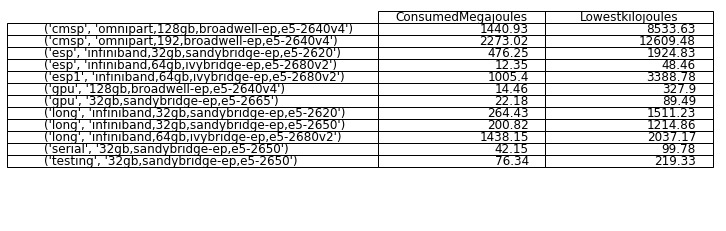

In [19]:
# send partition feature data data table to image and csv 
save_df_to_csv_png(pf_pie_data,'partition_feature.png', "partition_feature.csv")

In [57]:
#Aggregate using agg per partition 
partition_data = sub_data.groupby(['Partitions'])['ConsumedMegajoules', 'Lowestkilojoules'].agg('sum').round(2)
partition_data

consumed_joules_total = partition_data['ConsumedMegajoules'].sum().round(2)
consumed_joules_total 

7266.47

In [21]:
sub_data.to_csv("processed_energy.csv", index=False)

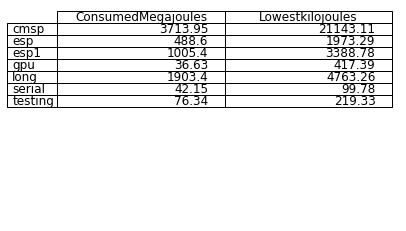

In [22]:
# Save partition to png and csv 
save_df_to_csv_png(partition_data,' partition_table.png', 'partition_table.csv')

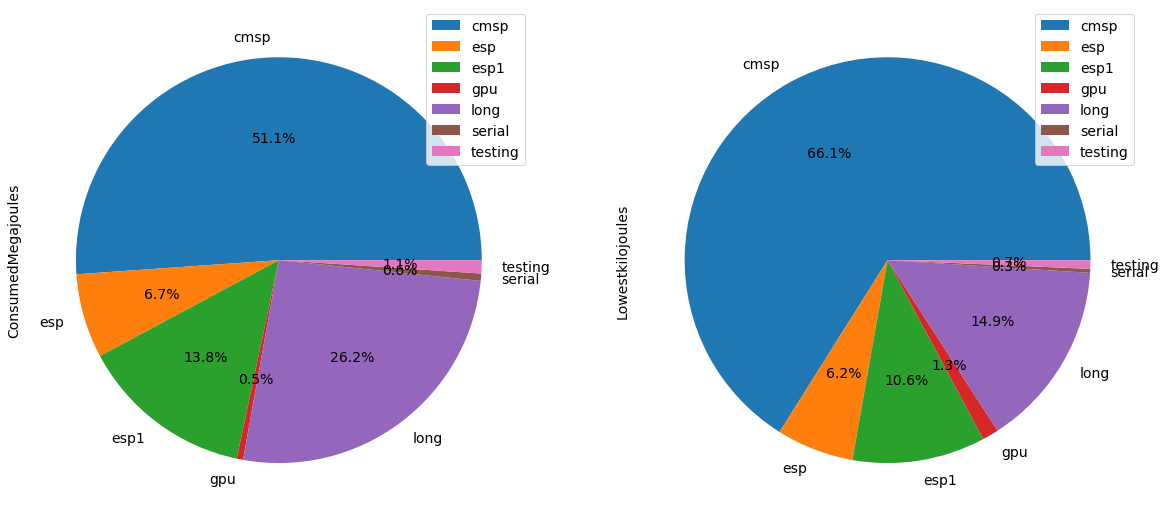

In [23]:
# Create pie data for partition data 
plot = partition_data.plot.pie(subplots=True, autopct='%1.1f%%',explode=(0, 0, 0, 0, 0, 0, 0), startangle=0, figsize=(20, 10))
fig = plot[0].get_figure()
fig.savefig("pie_partition.png")

In [24]:
#Get the statistsics for the database 
sub_data.describe().round(2)

,ConsumedMegajoules,Lowestkilojoules
count,147.00,147.00
mean,49.43,217.72
std,37.14,215.09
min,11.66,10.27
25%,15.46,77.19
50%,31.31,127.75
75%,89.22,333.29
max,119.69,916.75


In [25]:
# Calulcate ConsumedMegajoules and  Lowestkilojoules per feature.
feature_pie_data = sub_data.groupby(['AvailableFeatures'])['ConsumedMegajoules', 'Lowestkilojoules'].agg('sum').round(2)
feature_pie_data

,ConsumedMegajoules,Lowestkilojoules
AvailableFeatures,,
"128gb,broadwell-ep,e5-2640v4",14.46,327.90
"32gb,sandybridge-ep,e5-2650",118.49,319.11
"32gb,sandybridge-ep,e5-2665",22.18,89.49
"infiniband,32gb,sandybridge-ep,e5-2620",740.68,3436.06
"infiniband,32gb,sandybridge-ep,e5-2650",200.82,1214.86
"infiniband,64gb,ivybridge-ep,e5-2680v2",2455.90,5474.41
"omnipart,128gb,broadwell-ep,e5-2640v4",1440.93,8533.63
"omnipart,192,broadwell-ep,e5-2640v4",2273.02,12609.48


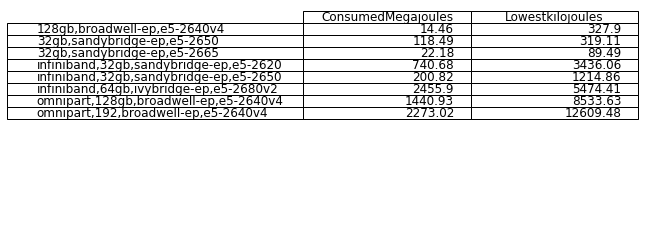

In [26]:
#This is the same as the table above 
plot = plt.subplot(111, frame_on=False, )
plot.xaxis.set_visible(False)
plot.yaxis.set_visible(False)
table(plot, feature_pie_data,loc='best')
plt.savefig('feature_table.png', dpi=100)

In [27]:
# Create enrgy pie_data  for features 
#plot1 = feature_pie_data.plot.pie(y='ConsumedMegajoules', subplots=True, autopct='%1.1f%%',explode=(0, 0, 0.3, 0, 0, 0, 0,0), startangle=90, figsize=(10, 10))
#fig = plot1[0].get_figure()
#fig.savefig("consumedjoules_pie_feature.png")

In [28]:
# Create enrgy pie_data  for features 
#plot1 = feature_pie_data.plot.pie(y='LowestJoules', subplots=True, autopct='%1.1f%%',explode=(0, 0, 0.3, 0, 0, 0, 0,0), startangle=90, figsize=(10, 10))
#fig = plot1[0].get_figure()
#fig.savefig("lowestjoules_pie_feature.png")

In [29]:
def get_partition(partition_name):
    data = sub_data.loc[sub_data['Partitions'] == partition_name ]
    final_df = data.groupby(['AvailableFeatures'])['ConsumedMegajoules', 'Lowestkilojoules'].agg('sum').round(2)
    return final_df
    

In [30]:
# Analysis for CMSP
#cmsp_data= data[]
#cmsp_data = sub_data.loc[sub_data['Partitions'] == 'cmsp']  

In [31]:
#cmsp_pie_data = cmsp_data.groupby(['AvailableFeatures'])['ConsumedMegajoules', 'Lowestkilojoules'].agg('sum').round(2)
cmsp_pie_data = get_partition('cmsp')
cmsp_pie_data

,ConsumedMegajoules,Lowestkilojoules
AvailableFeatures,,
"omnipart,128gb,broadwell-ep,e5-2640v4",1440.93,8533.63
"omnipart,192,broadwell-ep,e5-2640v4",2273.02,12609.48


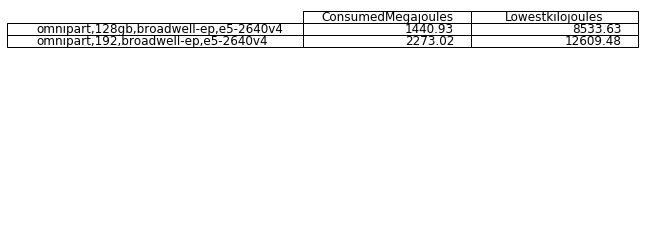

In [32]:
# Save partition to png and csv 
save_df_to_csv_png(cmsp_pie_data, 'cmsp_table.png', 'cmsp_table.csv')

In [33]:
# 
def draw_graph_pie(df, consumed, lowest):
    plot_consume = df.plot.pie(subplots=True, autopct='%1.1f%%',startangle=0, figsize=(15, 12))
    #plot_lowest = df.plot.pie(y='Lowestkilojoules',subplots=True, autopct='%1.1f%%',startangle=90, figsize=(10, 8))
    fig_consume = plot_consume[0].get_figure()
    #fig_lowest = plot_lowest[0].get_figure()
    fig_consume.savefig(consumed)
    #fig_lowest.savefig(lowest)

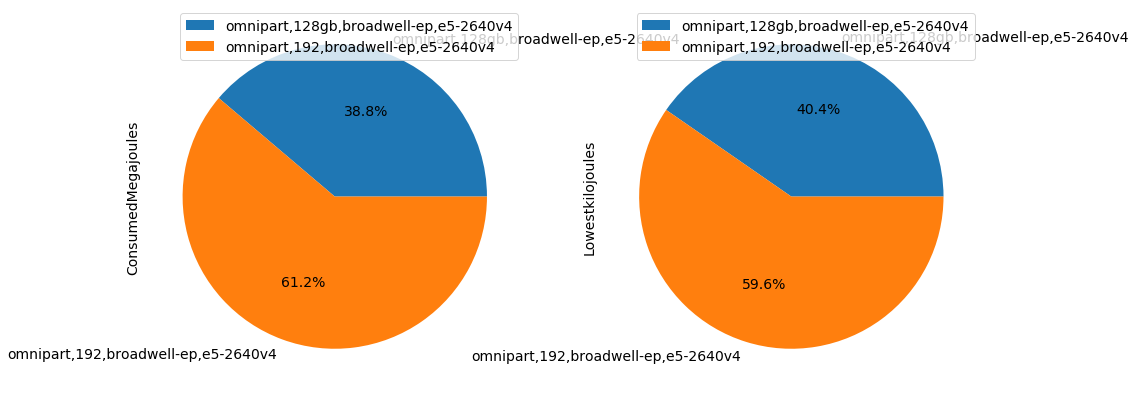

In [34]:
#cmsp energy ConsumedMegajoules plot 
#plot1 = cmsp_pie_data.plot.pie(y='ConsumedMegajoules',subplots=True, autopct='%1.1f%%',startangle=90, figsize=(10, 8))
#fig = plot1[0].get_figure()
#fig.savefig("consumedjoules_cmsp_partition.png")
draw_graph_pie(cmsp_pie_data, "consumedjoules_cmsp_partition.png", "lowestjoules_cmsp_partition.png")

In [35]:
#csmp energy Lowestkilojoules plot 
#plot1 = cmsp_pie_data.plot.pie(y='Lowestkilojoules',subplots=True, autopct='%1.1f%%',startangle=90, figsize=(10, 8))
#fig = plot1[0].get_figure()
#fig.savefig("lowestjoules_cmsp_partition.png")

In [36]:
def get_partition_data(partition_name):
    df = sub_data.loc[sub_data['Partitions'] == partition_name]  
    final_df = df.groupby(['AvailableFeatures'])['ConsumedMegajoules', 'Lowestkilojoules'].agg('sum').round(2)
    return final_df
    
    

In [37]:
# Analysis for long
#long_data = sub_data.loc[sub_data['Partitions'] == 'long']  
#long_pie_data = long_data.groupby(['AvailableFeatures'])['ConsumedMegajoules', 'Lowestkilojoules'].agg('sum').round(2)
long_pie_data = get_partition_data('long')
#long_pie_data.describe().round(2)

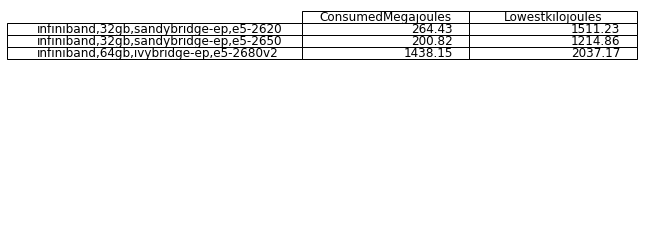

In [38]:
# Save partition to png and csv 
save_df_to_csv_png(long_pie_data, 'long_pie_data.png', 'long_pie_data.csv')

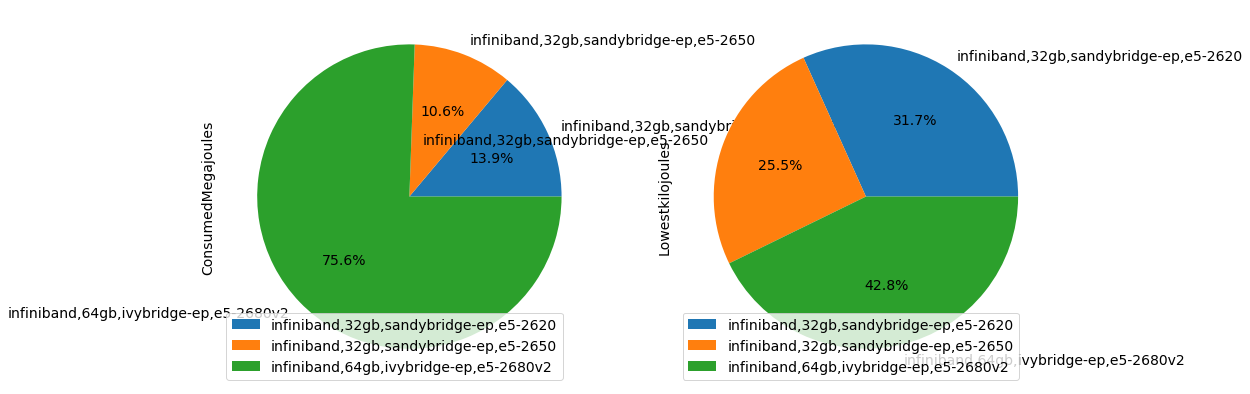

In [39]:
# draw 
draw_graph_pie(long_pie_data, "consumedjoules_long_partition.png", "lowestjoules_long_partition.png")

In [40]:
#long energy ConsumedMegajoules plot 
#long_pie = long_pie_data.plot.pie(y='ConsumedMegajoules',subplots=True, autopct='%1.1f%%',startangle=90, figsize=(10, 8))
#fig = long_pie[0].get_figure()
#fig.savefig("long_partition.png")

In [41]:
#long Lowestkilojoules plot 
#long_pie = long_pie_data.plot.pie(y='Lowestkilojoules',subplots=True, autopct='%1.1f%%',startangle=90, figsize=(10, 8))
#fig = long_pie[0].get_figure()
#fig.savefig("LowestJoules_long_partition.png")

In [42]:
#Analysis for GPU
#gpu_data = sub_data.loc[sub_data['Partitions'] == 'gpu']  
#gpu_pie_data = gpu_data.groupby(['AvailableFeatures'])['ConsumedMegajoules', 'Lowestkilojoules'].agg('sum').round(2)
gpu_pie_data = get_partition_data('gpu')

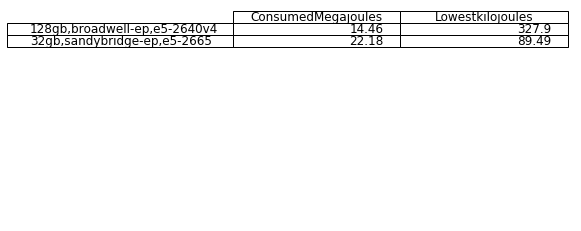

In [43]:
#plot = plt.subplot(111, frame_on=False, )
#plot.xaxis.set_visible(False)
#plot.yaxis.set_visible(False)
#table(plot, gpu_pie_data,loc='best')
#plt.savefig('gpu_table.png')
# Save partition to png and csv 
save_df_to_csv_png(gpu_pie_data, 'gpu_pie_data.png', 'gpu_pie_data.csv')

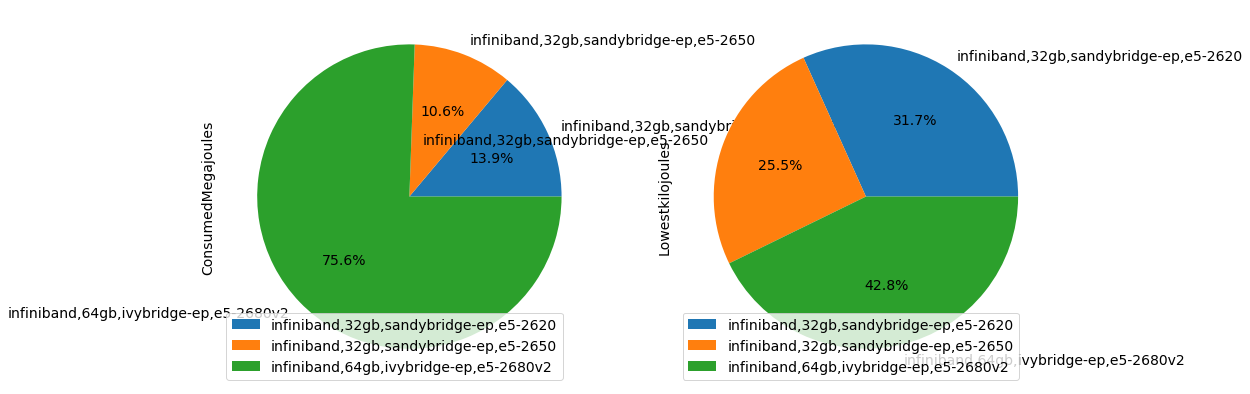

In [44]:
# draw 
draw_graph_pie(long_pie_data, "consumedjoules_gpu_partition.png", "lowestjoules_gpu_partition.png")

In [45]:
# energy GPU 
#gpu_pie = gpu_pie_data.plot.pie(y='ConsumedMegajoules', subplots=True, autopct='%1.1f%%',startangle=90, figsize=(15, 8))
#fig = long_pie[0].get_figure()
#fig.savefig("ConsumedJoules_gpu_partition.png")

In [46]:
#Analysis for ESP
esp_pie_data = get_partition_data('esp')


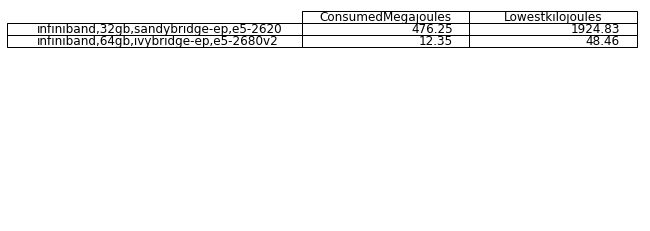

In [47]:
save_df_to_csv_png(esp_pie_data, 'esp_pie_data.png', 'esp_pie_data.csv')

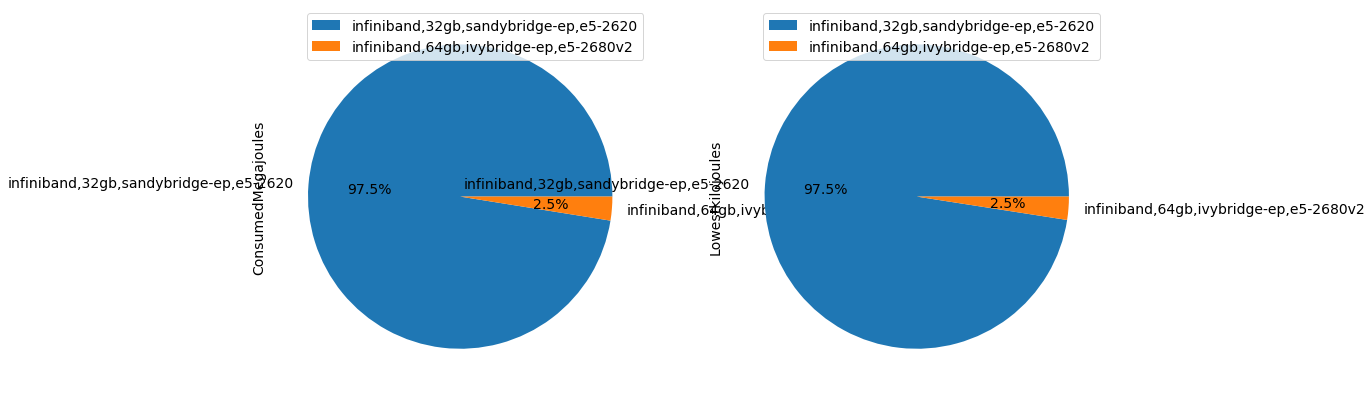

In [48]:
# draw 
draw_graph_pie(esp_pie_data, "consumedjoules_esp_partition.png", "lowestjoules_esp_partition.png")

In [49]:
#create link between the available features to short hand
# omnipart,128gb,broadwell-ep,e5-2640v4  - o_128_b_264
# omnipart,192,broadwell-ep,e5-2640v - o_192_b_264
# infiniband,32gb,sandybridge-ep,e5-2620 - i_32_s_262
# infiniband,64gb,ivybridge-ep,e5-2680v2 - i_64_i_268
# 128gb,broadwell-ep,e5-2640v4 - 128_b_264
# 32gb,sandybridge-ep,e5-2665 - 32_s_2665
# infiniband,32gb,sandybridge-ep,e5-2650 - i_32_s_265
# infiniband,64gb,ivybridge-ep,e5-2680v2 - i_64_i_268
# 32gb,sandybridge-ep,e5-2650 - 32_s_265

#data = data.replace(to_replace ="omnipart,128gb,broadwell-ep,e5-2640v4", value ="o_128_b_264", regex=True) 
#data = data.replace(to_replace ="omnipart,192,broadwell-ep,e5-2640v", value ="o_192_b_264", regex=True) 
#data = data.replace(to_replace ="infiniband,32gb,sandybridge-ep,e5-2620", value ="i_32_s_262", regex=True) 
#data = data.replace(to_replace ="infiniband,64gb,ivybridge-ep,e5-2680v2", value ="i_64_i_268", regex=True) 
#data = data.replace(to_replace ="128gb,broadwell-ep,e5-2640v4", value ="128_b_264", regex=True) 
#data = data.replace(to_replace ="32gb,sandybridge-ep,e5-2665", value ="32_s_2665", regex=True)
#data = data.replace(to_replace ="infiniband,32gb,sandybridge-ep,e5-2650", value ="i_32_s_265", regex=True)
#data = data.replace(to_replace ="infiniband,64gb,ivybridge-ep,e5-2680v2", value ="i_64_i_268", regex=True)
#data = data.replace(to_replace ="32gb,sandybridge-ep,e5-2650", value ="32_s_265", regex=True)




In [50]:
# Calulcate this per feature.
feature_pie_data = sub_data.groupby(['AvailableFeatures'])['ConsumedMegajoules', 'Lowestkilojoules'].agg('sum').round(2)
feature_pie_data

,ConsumedMegajoules,Lowestkilojoules
AvailableFeatures,,
"128gb,broadwell-ep,e5-2640v4",14.46,327.90
"32gb,sandybridge-ep,e5-2650",118.49,319.11
"32gb,sandybridge-ep,e5-2665",22.18,89.49
"infiniband,32gb,sandybridge-ep,e5-2620",740.68,3436.06
"infiniband,32gb,sandybridge-ep,e5-2650",200.82,1214.86
"infiniband,64gb,ivybridge-ep,e5-2680v2",2455.90,5474.41
"omnipart,128gb,broadwell-ep,e5-2640v4",1440.93,8533.63
"omnipart,192,broadwell-ep,e5-2640v4",2273.02,12609.48


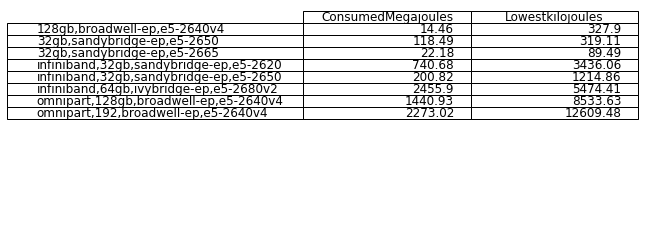

In [51]:
#feature table 
#plot = plt.subplot(111, frame_on=False, )
#plot.xaxis.set_visible(False)
#plot.yaxis.set_visible(False)
#table(plot, feature_pie_data,loc='best')
#plt.savefig('feature_table.png')
save_df_to_csv_png(feature_pie_data, 'feature_table.png', 'feature_table.csv')

In [54]:
# draw 
#draw_graph_pie(feature_pie_data, "consumedjoules_pie_feature.png", "lowestjoules_pie_feature.png")

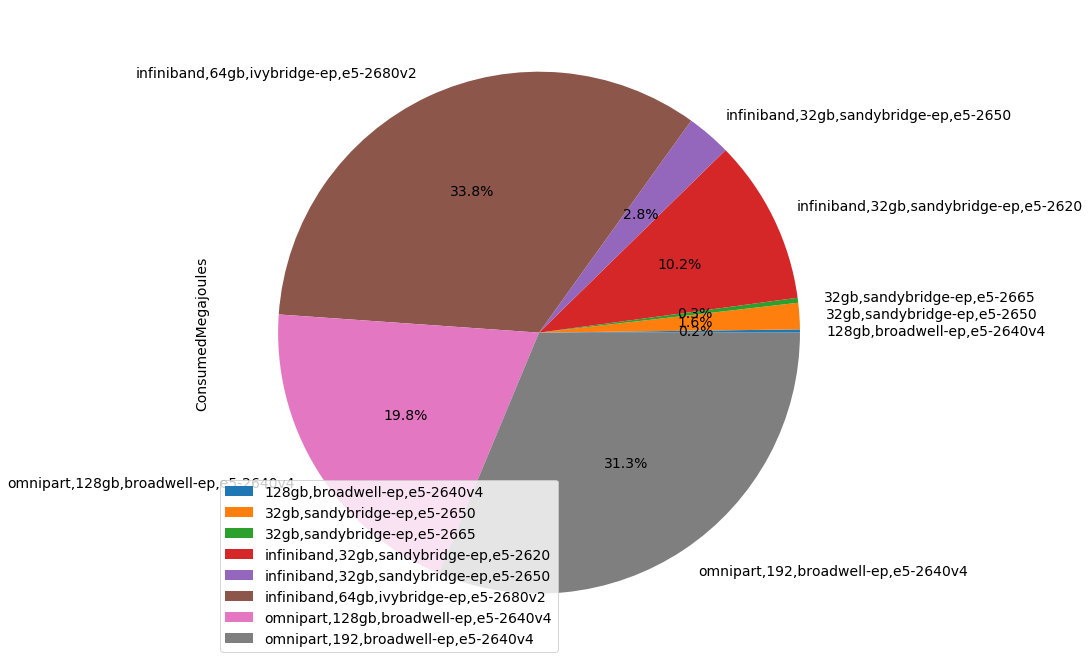

In [53]:
# Create enrgy pie_data  for features 
plot1 = feature_pie_data.plot.pie(y='ConsumedMegajoules', subplots=True, autopct='%1.1f%%',explode=(0, 0, 0, 0, 0, 0, 0,0), startangle=0, figsize=(15, 12))
fig = plot1[0].get_figure()
fig.savefig("consumedjoules_pie_feature.png")